In [1]:
import pandas as pd
from pathlib import Path
import librosa
import matplotlib.pyplot as plt

from bird_classifier.utils import load_sample
from bird_classifier.preprocessing import preprocess, extract_mel_db_spec
from bird_classifier.augment import time_domain_augment, spec_augment

In [2]:
annotations_csv = Path("~/data/kenya_birds/annotations.csv").expanduser()
recordings_path = Path("~/data/kenya_birds/soundscape_data/").expanduser()

print("annotations: ", annotations_csv.exists())
print("recordings: ", recordings_path.exists())

annotations:  True
recordings:  True


In [3]:
df = pd.read_csv(annotations_csv)

df.head(5)

,Filename,Start Time (s),End Time (s),Species eBird Code
0,KEN_001_20211207_153852.flac,67.8,67.8,slcbou1
1,KEN_001_20211207_153852.flac,106.8,106.8,slcbou1
2,KEN_001_20211207_153852.flac,107.5,107.5,hamerk1
3,KEN_001_20211207_153852.flac,118.4,118.4,slcbou1
4,KEN_001_20211207_153852.flac,209.1,209.1,hamerk1


### Preprocess and augmentation visualisation

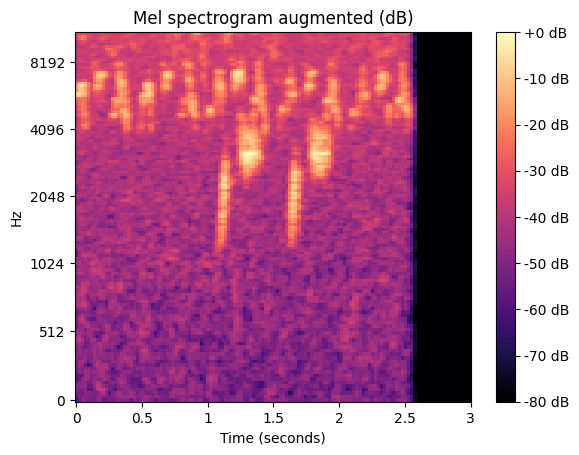

In [4]:
dur = 3.0
sr = 22050
# iterate over train and data and load sample
row = df.sample().iloc[0]

file_p = recordings_path / row['Filename']
center_time = (row['Start Time (s)'] + row['End Time (s)']) / 2
sample, sr = load_sample(file_p, center_time, dur=dur, sr_target=sr)
prep_sample = preprocess(sample, sr)
time_aug_sample = time_domain_augment(prep_sample, sr=sr)
mel_db_spec, _ = extract_mel_db_spec(time_aug_sample, sr=sr)
aug_spec = spec_augment(mel_db_spec)
plt.figure()
librosa.display.specshow(aug_spec, sr=sr, x_axis='s', y_axis='mel')
plt.title('Mel spectrogram augmented (dB)')
plt.colorbar(format='%+2.0f dB')

	